# Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.

In [1]:
import pandas as pd
import numpy as np
import re
import os

### For installing missingno library, type this command in terminal
#pip install missingno

##import missingno as msno

#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

### Read data - train.csv

In [2]:
data = pd.read_csv("train.csv")
data.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
0   87.009  ...            0            0        NaN        NaN        NaN   
1  122.787  ...            0            0        NaN        1.0        NaN   
2  103.176  ...            0            0        NaN        NaN        NaN   
3  205.260  ...            0            0        NaN        NaN        NaN   
4  128.191  ...            1            0        1.0        1.0        1.0   

    aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
0  1958         0.0         0.0         0.0                  0  
1   710         0.0         0.0         0.0                  0  
2   882         0.0         0.0         0.0                  0  
3   982         0.0         0.0         0.0                  0  
4   647         0.0         0.0         0.0                  0  

[5 rows x 172 columns]

In [3]:
churn_data = data.copy()
churn_data.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
0   87.009  ...            0            0        NaN        NaN        NaN   
1  122.787  ...            0            0        NaN        1.0        NaN   
2  103.176  ...            0            0        NaN        NaN        NaN   
3  205.260  ...            0            0        NaN        NaN        NaN   
4  128.191  ...            1            0        1.0        1.0        1.0   

    aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
0  1958         0.0         0.0         0.0                  0  
1   710         0.0         0.0         0.0                  0  
2   882         0.0         0.0         0.0                  0  
3   982         0.0         0.0         0.0                  0  
4   647         0.0         0.0         0.0                  0  

[5 rows x 172 columns]

In [4]:
all_columns = churn_data.columns.tolist()
all_columns

['id',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 

In [5]:
churn_data["churn_probability"].value_counts()

churn_probability
0    62867
1     7132
Name: count, dtype: int64

**Customer behaviour during churn:**

Customers usually do not decide to switch to another competitor instantly, but rather over a
period of time (this is especially applicable to high-value customers). In churn prediction, we
assume that there are three phases of customer lifecycle :

1. <u>The ‘good’ phase:</u> In this phase, the customer is happy with the service and behaves as usual.

2. <u>The ‘action’ phase:</u> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. <u>The ‘churn’ phase:</u> In this phase, the customer is said to have churned. In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month (September) is the ‘churn’ phase.

# High Value Customer

In [6]:
rech_col = [col for col in all_columns if 'rech' in col]
rech_col

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

In [7]:
churn_data['total_data_rech_amt_6'] = churn_data['av_rech_amt_data_6'] * churn_data['total_rech_data_6']
churn_data['total_data_rech_amt_7'] = churn_data['av_rech_amt_data_7'] * churn_data['total_rech_data_7']
churn_data['total_data_rech_amt_8'] = churn_data['av_rech_amt_data_8'] * churn_data['total_rech_data_8']

# Drop the columns already accounted for 
churn_data.drop(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',  'av_rech_amt_data_6',
              'av_rech_amt_data_7', 'av_rech_amt_data_8'], axis=1, inplace=True)

# Find Average recharge amount for good phase i.e 6th and 7th month
good_phase_average_rech_amt = ( churn_data['total_rech_amt_6'].fillna(0) + churn_data['total_rech_amt_7'].fillna(0) + 
                               churn_data['total_data_rech_amt_6'].fillna(0) + churn_data['total_data_rech_amt_7'].fillna(0) ) / 2

# 70 percentile of the good_phase_average_rech_amt data
gd_phase_avg_rech_amt_70 = np.percentile(good_phase_average_rech_amt, 70.0)
print(f'70 Percentile of recharge amount is : {gd_phase_avg_rech_amt_70}')

# Keep high value customer data
churn_data = churn_data[good_phase_average_rech_amt >= gd_phase_avg_rech_amt_70]

print(f'Shape of high value customer data: {churn_data.shape}')

70 Percentile of recharge amount is : 477.5
Shape of high value customer data: (21013, 169)


# Data Cleaning

In [8]:
# Checking for missing values
msng_values = round(churn_data.isna().sum() / len(churn_data) * 100, 2).sort_values(ascending=False)
msng_values

total_data_rech_amt_8       46.79
night_pck_user_8            46.79
date_of_last_rech_data_8    46.79
count_rech_2g_8             46.79
count_rech_3g_8             46.79
                            ...  
vol_3g_mb_7                  0.00
vol_3g_mb_8                  0.00
max_rech_amt_6               0.00
total_ic_mou_8               0.00
id                           0.00
Length: 169, dtype: float64

In [9]:
# Select columns with more than 40% missing values
drop_msng_col = msng_values[msng_values > 40].index.tolist()
# Drop columns > 40% missing
churn_data.drop(drop_msng_col, axis=1, inplace=True)
churn_data.shape

(21013, 142)

In [10]:
missing_data_percent = 100*churn_data.isnull().sum()/len(churn_data)
missing_data_percent

id                   0.000000
circle_id            0.000000
loc_og_t2o_mou       0.794746
std_og_t2o_mou       0.794746
loc_ic_t2o_mou       0.794746
                       ...   
aon                  0.000000
aug_vbc_3g           0.000000
jul_vbc_3g           0.000000
jun_vbc_3g           0.000000
churn_probability    0.000000
Length: 142, dtype: float64

In [11]:
# Check columns for only 1 unique value
drop_col_sngl_val = []

for col in churn_data.columns:
    if churn_data[f'{col}'].nunique() == 1:
        drop_col_sngl_val.append(col)

drop_col_sngl_val

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [12]:
# Drop single value columns
churn_data.drop(drop_col_sngl_val, axis=1, inplace=True)
churn_data.shape

(21013, 129)

In [13]:
round(churn_data.isna().sum() / len(churn_data) * 100, 2).sort_values(ascending=False)

std_og_t2f_mou_8      3.91
loc_og_mou_8          3.91
loc_og_t2c_mou_8      3.91
loc_ic_t2m_mou_8      3.91
og_others_8           3.91
                      ... 
max_rech_amt_6        0.00
max_rech_amt_7        0.00
max_rech_amt_8        0.00
last_day_rch_amt_6    0.00
churn_probability     0.00
Length: 129, dtype: float64

In [14]:
# Drop rows with missing values
for col in churn_data.columns:
    churn_data = churn_data[~churn_data[col].isna()]
    
# Re-check missing values
round(churn_data.isna().sum() / len(churn_data) * 100, 2).sort_values(ascending=False)

id                   0.0
loc_ic_mou_7         0.0
total_rech_amt_7     0.0
total_rech_amt_6     0.0
total_rech_num_8     0.0
                    ... 
std_og_t2f_mou_7     0.0
std_og_t2f_mou_6     0.0
std_og_t2m_mou_8     0.0
std_og_t2m_mou_7     0.0
churn_probability    0.0
Length: 129, dtype: float64

In [15]:
# The date columns don't add any value excpet for marking the last day of the period so we will drop them
date_col = [col for col in churn_data.columns if 'date' in col]
churn_data.drop(date_col, axis=1, inplace=True)
[col for col in churn_data.columns if 'date' in col]

[]

<Axes: >

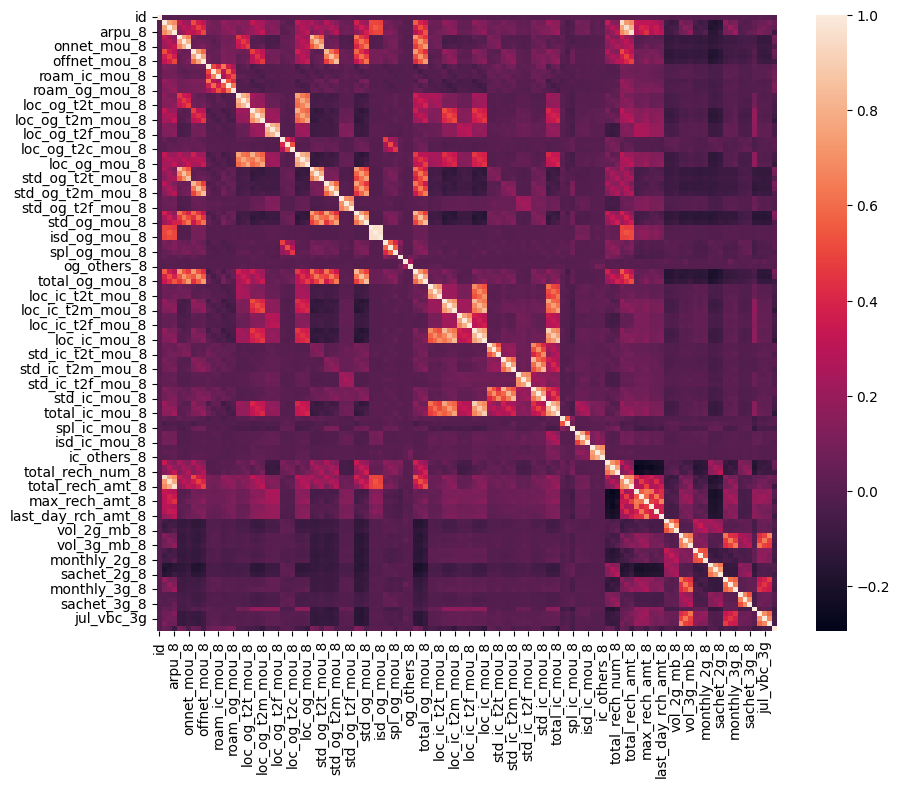

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(pd.DataFrame(churn_data).corr())

In [17]:
# List of columns that are explained well by other columns
drop_col_corr = ['loc_og_t2m_mou_6', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 
                 'std_og_t2m_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 
                 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 
                 'std_ic_t2m_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 
                 'total_rech_amt_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8']

# Drop the high corr columns
churn_data.drop(drop_col_corr, axis=1, inplace=True)
churn_data.shape

(19721, 87)

# Data Understanding, Preparation, and Pre-Processing

In [18]:
# Create a total mou instead of offnet and onnet

churn_data['total_mou_6'] = churn_data['onnet_mou_6'] + churn_data['offnet_mou_6']
churn_data['total_mou_7'] = churn_data['onnet_mou_7'] + churn_data['offnet_mou_7']
churn_data['total_mou_8'] = churn_data['onnet_mou_8'] + churn_data['offnet_mou_8']

# Drop the redundant columns
churn_data.drop(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], axis=1, inplace=True)

churn_data.head()

id    arpu_6   arpu_7   arpu_8  roam_ic_mou_6  roam_ic_mou_7  \
4    4   240.708  128.191  101.565          53.64            0.0   
15  15   580.549  377.294  338.286           0.00            0.0   
23  23  1130.948  905.506  479.762           0.00            0.0   
24  24   371.974  352.069  240.449           0.00            0.0   
27  27   390.489  350.985  421.300           0.00            0.0   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  ...  \
4             0.0          15.73            0.0            0.0  ...   
15            0.0           0.00            0.0            0.0  ...   
23            0.0           0.00            0.0            0.0  ...   
24            0.0           0.00            0.0            0.0  ...   
27            0.0           0.00            0.0            0.0  ...   

    sachet_3g_7  sachet_3g_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
4             1            0   647         0.0        0.00        0.00   
15            0            0   602         0.0        0.00        0.00   
23            0            0   455         0.0        0.00        0.00   
24            0            0  1219         0.0        0.00        0.00   
27            1            1   573       700.4      185.71      173.72   

    churn_probability  total_mou_6  total_mou_7  total_mou_8  
4                   0        78.27        42.94        15.76  
15                  0       327.54       366.78       391.52  
23                  0      1152.99       822.82       387.80  
24                  0       624.37       546.05       251.89  
27                  0       141.74       170.21       195.51  

[5 rows x 84 columns]

In [19]:
# Seperate columns for 6th and 7th month
col_for_6_7 = [col[:-2] for col in churn_data.columns if '6' in col or '7' in col]

# Create new feature and drop the redundant columns
for col in set(col_for_6_7):
    churn_data[f'gd_ph_{col}'] = ( churn_data[f'{col}_6'] + churn_data[f'{col}_7'] ) / 2
    churn_data.drop([f'{col}_6', f'{col}_7'], axis=1, inplace=True)
        
churn_data.head()

id   arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
4    4  101.565            0.0            0.0              0.00         15.76   
15  15  338.286            0.0            0.0              0.00        385.26   
23  23  479.762            0.0            0.0              0.00        387.79   
24  24  240.449            0.0            0.0              0.36        129.73   
27  27  421.300            0.0            0.0              0.00        195.51   

    std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  ...  \
4               0.00          0.00           0.0          0.00  ...   
15              6.26          6.26           0.0          0.00  ...   
23              0.00          0.00           0.0          0.01  ...   
24              0.00        121.79           0.0          0.36  ...   
27              0.00          0.00           0.0          0.00  ...   

    gd_ph_last_day_rch_amt  gd_ph_total_rech_num  gd_ph_isd_og_mou  \
4                     17.5                  11.5               0.0   
15                    75.0                   4.0               0.0   
23                    80.0                  22.5               0.0   
24                    55.0                   7.0               0.0   
27                   155.0                  10.5               0.0   

    gd_ph_roam_og_mou  gd_ph_sachet_3g  gd_ph_monthly_3g  gd_ph_isd_ic_mou  \
4               7.865              0.5               0.0               0.0   
15              0.000              0.0               0.0               0.0   
23              0.000              0.0               0.0               0.0   
24              0.000              0.0               0.0               0.0   
27              0.000              0.5               0.0               0.0   

    gd_ph_max_rech_amt  gd_ph_ic_others  gd_ph_sachet_2g  
4                 45.5            0.000              6.5  
15               250.0            0.000              0.0  
23               110.0            0.075              0.0  
24               110.0            0.000              1.5  
27               177.0            0.000              2.0  

[5 rows x 58 columns]

In [20]:
# Create new column
churn_data['gd_ph_vbc_3g'] = ( churn_data['jul_vbc_3g'] + churn_data['jun_vbc_3g'] ) / 2

# Drop redundant column
churn_data.drop(['jul_vbc_3g', 'jun_vbc_3g', ], axis=1, inplace=True)

# Rename the august column for vbc to vbc_3g_8
churn_data['vbc_3g_8'] = churn_data['aug_vbc_3g']
churn_data.drop('aug_vbc_3g', axis=1, inplace=True)

churn_data.head()

id   arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
4    4  101.565            0.0            0.0              0.00         15.76   
15  15  338.286            0.0            0.0              0.00        385.26   
23  23  479.762            0.0            0.0              0.00        387.79   
24  24  240.449            0.0            0.0              0.36        129.73   
27  27  421.300            0.0            0.0              0.00        195.51   

    std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  ...  \
4               0.00          0.00           0.0          0.00  ...   
15              6.26          6.26           0.0          0.00  ...   
23              0.00          0.00           0.0          0.01  ...   
24              0.00        121.79           0.0          0.36  ...   
27              0.00          0.00           0.0          0.00  ...   

    gd_ph_isd_og_mou  gd_ph_roam_og_mou  gd_ph_sachet_3g  gd_ph_monthly_3g  \
4                0.0              7.865              0.5               0.0   
15               0.0              0.000              0.0               0.0   
23               0.0              0.000              0.0               0.0   
24               0.0              0.000              0.0               0.0   
27               0.0              0.000              0.5               0.0   

    gd_ph_isd_ic_mou  gd_ph_max_rech_amt  gd_ph_ic_others  gd_ph_sachet_2g  \
4                0.0                45.5            0.000              6.5   
15               0.0               250.0            0.000              0.0   
23               0.0               110.0            0.075              0.0   
24               0.0               110.0            0.000              1.5   
27               0.0               177.0            0.000              2.0   

    gd_ph_vbc_3g  vbc_3g_8  
4          0.000       0.0  
15         0.000       0.0  
23         0.000       0.0  
24         0.000       0.0  
27       179.715     700.4  

[5 rows x 57 columns]

In [21]:
# Reset the index 
churn_data.reset_index(inplace=True, drop=True)
churn_data.head()

id   arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
0   4  101.565            0.0            0.0              0.00         15.76   
1  15  338.286            0.0            0.0              0.00        385.26   
2  23  479.762            0.0            0.0              0.00        387.79   
3  24  240.449            0.0            0.0              0.36        129.73   
4  27  421.300            0.0            0.0              0.00        195.51   

   std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  ...  \
0              0.00          0.00           0.0          0.00  ...   
1              6.26          6.26           0.0          0.00  ...   
2              0.00          0.00           0.0          0.01  ...   
3              0.00        121.79           0.0          0.36  ...   
4              0.00          0.00           0.0          0.00  ...   

   gd_ph_isd_og_mou  gd_ph_roam_og_mou  gd_ph_sachet_3g  gd_ph_monthly_3g  \
0               0.0              7.865              0.5               0.0   
1               0.0              0.000              0.0               0.0   
2               0.0              0.000              0.0               0.0   
3               0.0              0.000              0.0               0.0   
4               0.0              0.000              0.5               0.0   

   gd_ph_isd_ic_mou  gd_ph_max_rech_amt  gd_ph_ic_others  gd_ph_sachet_2g  \
0               0.0                45.5            0.000              6.5   
1               0.0               250.0            0.000              0.0   
2               0.0               110.0            0.075              0.0   
3               0.0               110.0            0.000              1.5   
4               0.0               177.0            0.000              2.0   

   gd_ph_vbc_3g  vbc_3g_8  
0         0.000       0.0  
1         0.000       0.0  
2         0.000       0.0  
3         0.000       0.0  
4       179.715     700.4  

[5 rows x 57 columns]

In [22]:
churn_data.describe()

id        arpu_8  roam_ic_mou_8  roam_og_mou_8  \
count  19721.000000  19721.000000   19721.000000   19721.000000   
mean   35026.047107    526.971273      12.682434      20.308498   
std    20162.697419    518.976437      74.559522     107.504295   
min        4.000000   -345.129000       0.000000       0.000000   
25%    17604.000000    257.674000       0.000000       0.000000   
50%    35089.000000    445.339000       0.000000       0.000000   
75%    52417.000000    671.302000       0.000000       0.000000   
max    69997.000000  33543.624000    4169.810000    5337.040000   

       loc_og_t2c_mou_8  loc_og_mou_8  std_og_t2f_mou_8  std_og_mou_8  \
count      19721.000000  19721.000000      19721.000000  19721.000000   
mean           1.765427    245.636900          1.620518    324.950037   
std            7.224700    366.765038         10.818013    613.319372   
min            0.000000      0.000000          0.000000      0.000000   
25%            0.000000     31.360000          0.000000      0.000000   
50%            0.000000    124.290000          0.000000     36.010000   
75%            0.110000    323.190000          0.000000    396.940000   
max          351.830000  11039.910000        354.160000  13980.060000   

       isd_og_mou_8  spl_og_mou_8  ...  gd_ph_isd_og_mou  gd_ph_roam_og_mou  \
count  19721.000000  19721.000000  ...      19721.000000       19721.000000   
mean       2.160061      7.008838  ...          2.174609          24.149188   
std       53.320961     22.146069  ...         52.816116          96.029128   
min        0.000000      0.000000  ...          0.000000           0.000000   
25%        0.000000      0.000000  ...          0.000000           0.000000   
50%        0.000000      0.700000  ...          0.000000           0.000000   
75%        0.000000      6.610000  ...          0.000000           3.450000   
max     5681.540000    954.510000  ...       5695.470000        2410.835000   

       gd_ph_sachet_3g  gd_ph_monthly_3g  gd_ph_isd_ic_mou  \
count     19721.000000      19721.000000      19721.000000   
mean          0.220983          0.211855         11.189731   
std           0.962322          0.557126         72.473501   
min           0.000000          0.000000          0.000000   
25%           0.000000          0.000000          0.000000   
50%           0.000000          0.000000          0.000000   
75%           0.000000          0.000000          0.515000   
max          26.500000         10.000000       5651.025000   

       gd_ph_max_rech_amt  gd_ph_ic_others  gd_ph_sachet_2g  gd_ph_vbc_3g  \
count        19721.000000     19721.000000     19721.000000  19721.000000   
mean           166.500786         1.415697         1.154581    167.709972   
std            143.676076        15.953577         2.452019    395.028779   
min              0.000000         0.000000         0.000000      0.000000   
25%            102.000000         0.000000         0.000000      0.000000   
50%            127.000000         0.000000         0.000000      0.000000   
75%            198.000000         0.240000         1.000000    151.835000   
max           3299.000000      1420.040000        38.000000   8190.585000   

           vbc_3g_8  
count  19721.000000  
mean     172.907805  
std      426.610142  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%      142.400000  
max    12916.220000  

[8 rows x 57 columns]

## Exploratory Data Analysis

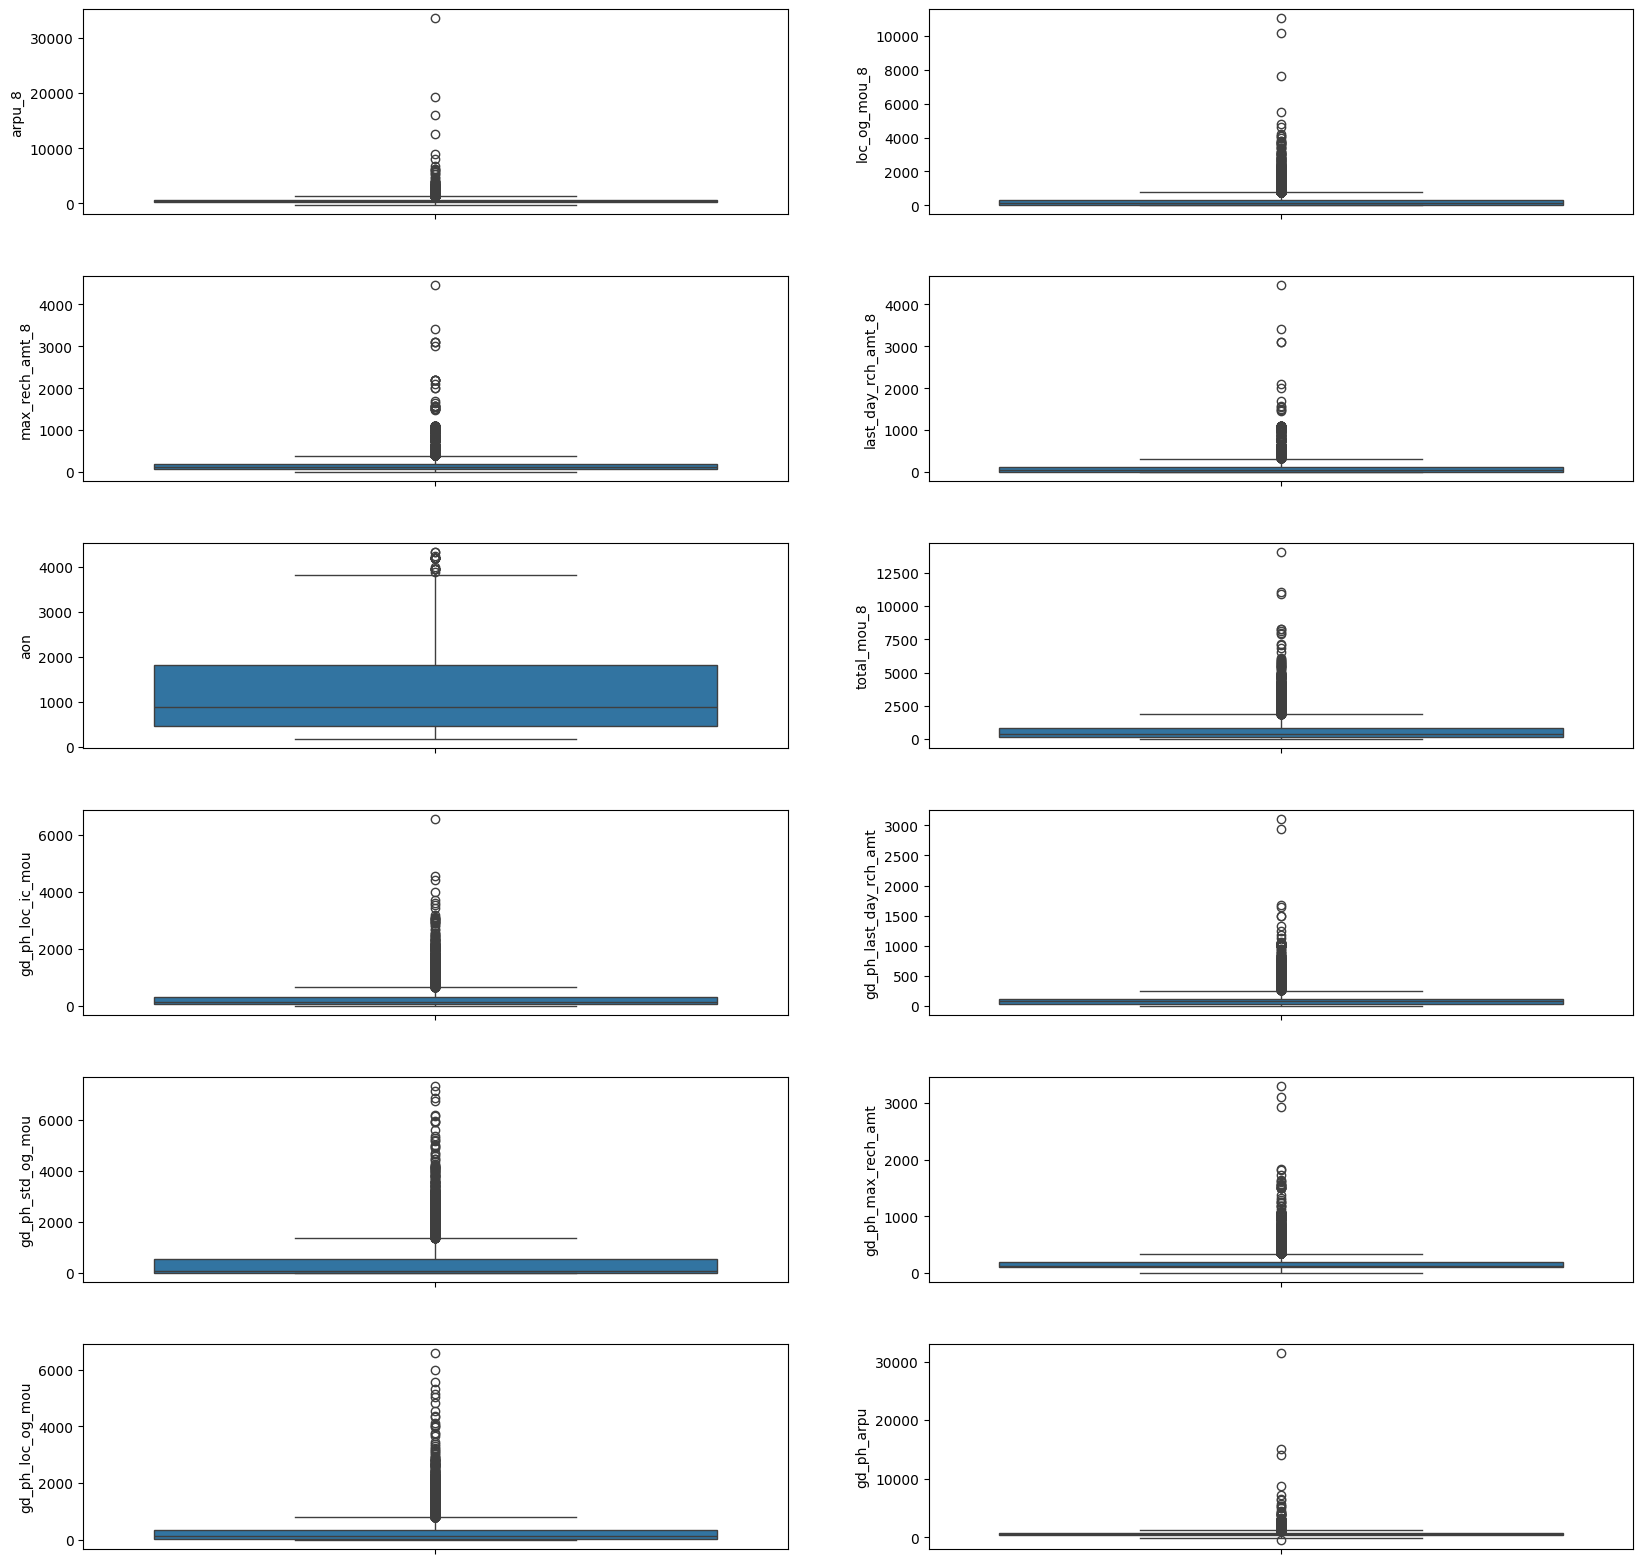

In [23]:
# List of features to be analyzed
col_boxplot = ['arpu_8', 'loc_og_mou_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'aon', 'total_mou_8', 
               'gd_ph_loc_ic_mou', 'gd_ph_last_day_rch_amt', 'gd_ph_std_og_mou', 'gd_ph_max_rech_amt', 
              'gd_ph_loc_og_mou', 'gd_ph_arpu']

# Plot boxplots for each variable
fig, axes = plt.subplots(6, 2, figsize=(20, 20))
# sns.boxplot(x=churn_data['arpu_8'], ax=axes[0])
for index, col in enumerate(col_boxplot):
    i, j = divmod(index, 2)
    sns.boxplot(churn_data[col], ax=axes[i, j])
    
plt.subplots_adjust(hspace=0.3) 
plt.show()

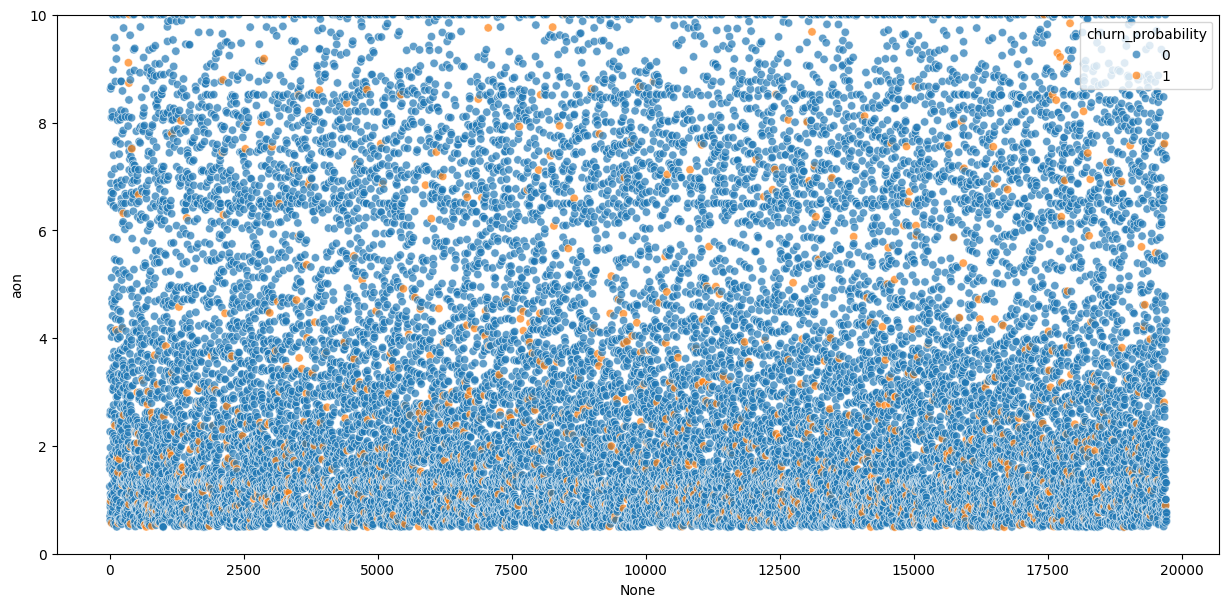

In [24]:
# Check churn based on tenure

plt.figure(figsize=(15,7))
sns.scatterplot(y=churn_data['aon'] / 365, x=churn_data.index, hue=churn_data.churn_probability, alpha=0.7)
plt.ylim(0,10)
plt.show()

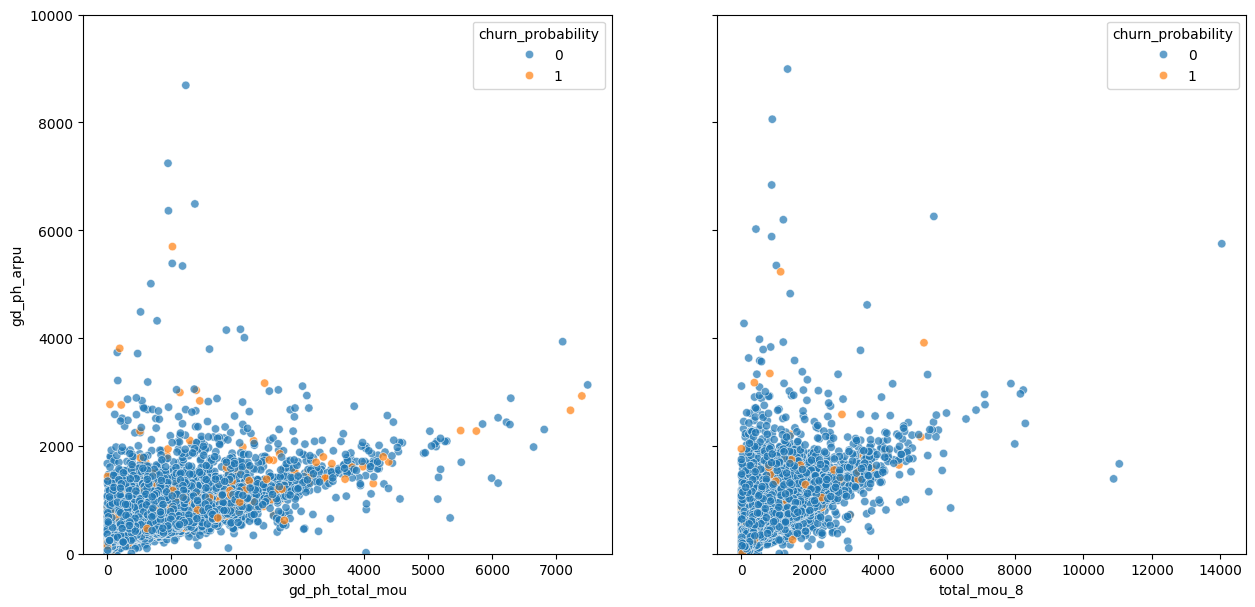

In [25]:
# Lets check how the VBC effects the revenue
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(y='gd_ph_arpu', x='gd_ph_total_mou', data=churn_data, ax=axes[0], hue='churn_probability', alpha=0.7)
sns.scatterplot(y='arpu_8', x='total_mou_8', data=churn_data, ax=axes[1], hue='churn_probability', alpha=0.7)


# Limiting the graph to more general upper bound
plt.ylim(0,10000)
plt.show()

Observation
 - We can clearly see that MOU have dropped significantly for the churners in the action pahse i.e 8th month, thus hitting the revenue generated from them
 - It is also interesting that though the MOU is between 0-2000, the revenue is highest in that region that tells us these users had other services that were boosting the revenue

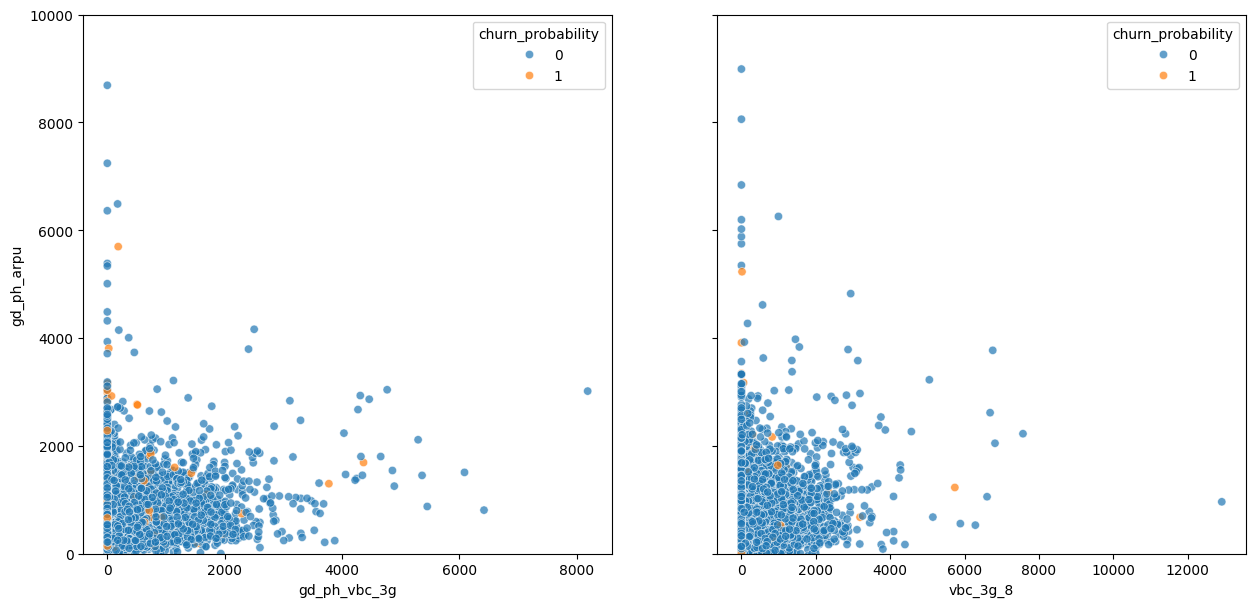

In [26]:
# Lets check how the total_mou effects the revenue
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(y='gd_ph_arpu', x='gd_ph_vbc_3g', data=churn_data, ax=axes[0], hue='churn_probability', alpha=0.7)
sns.scatterplot(y='arpu_8', x='vbc_3g_8', data=churn_data, ax=axes[1], hue='churn_probability', alpha=0.7)


# Limiting the graph to more general upper bound
plt.ylim(0,10000)
plt.show()

Observation
 - We can see that the users who were using very less amount of VBC data and yet were generating high revenue churned
 - Yet again we see that the revenue is higher towards the lesser consumption side

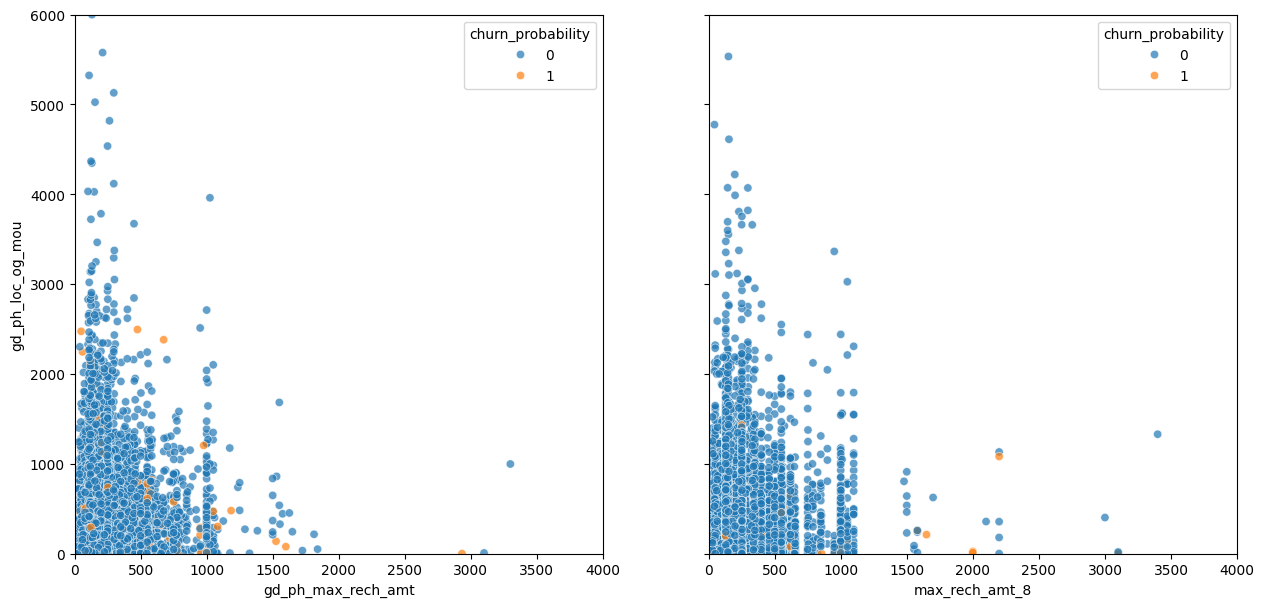

In [27]:
# Lets check the relation between recharge amount and local outgoing calls

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(x='gd_ph_max_rech_amt', y='gd_ph_loc_og_mou', data=churn_data, ax=axes[0],
                hue='churn_probability', alpha=0.7)
sns.scatterplot(x='max_rech_amt_8', y='loc_og_mou_8', data=churn_data, ax=axes[1], hue='churn_probability', alpha=0.7)

# Limiting the graph to more general upper bound
axes[0].set_xlim(0,4000)
axes[1].set_xlim(0,4000)
plt.ylim(0,6000)

plt.show()

Observations
 - Users who were recharging with high amounts were using the service for local uses less as compared to user who did lesser amounts of recharge
 - Intuitevly people whose max recharge amount as well as local out going were very less even in the good phase churned more


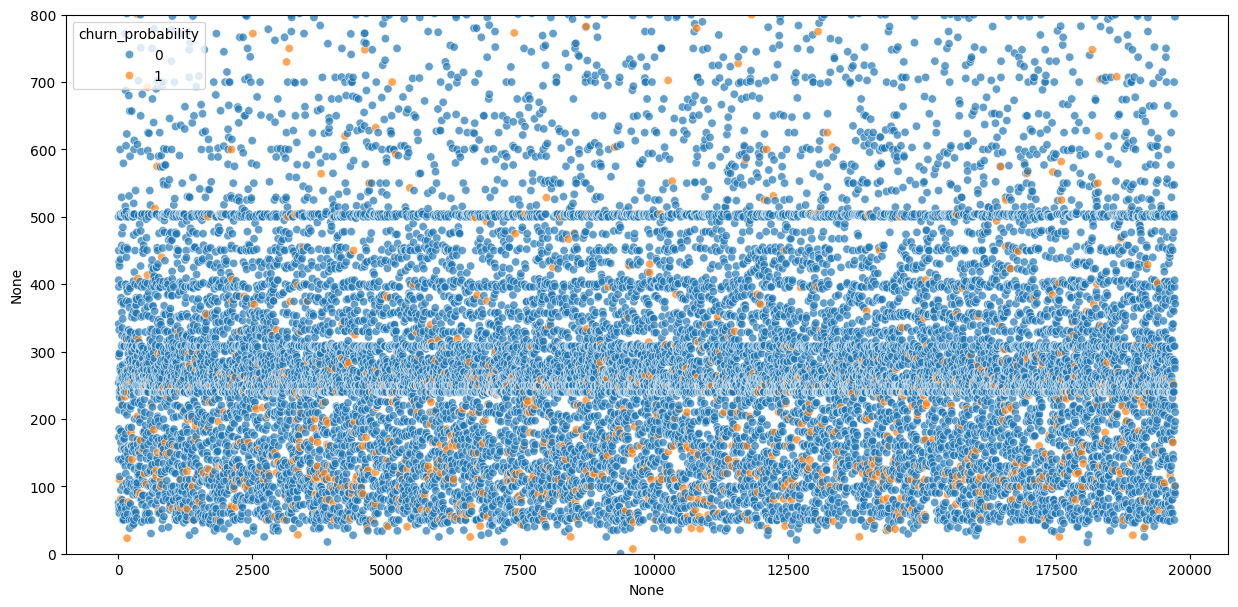

In [28]:
# Check the effect of max recharge amount on churn

plt.figure(figsize=(15,7))
sns.scatterplot(x=churn_data.index, y=churn_data['gd_ph_max_rech_amt'] + churn_data['max_rech_amt_8'],
                hue=churn_data['churn_probability'], alpha=0.7)
plt.ylim(0,800)
plt.show()

Observation
 - We can see that users who had the max recharge amount less tha 200 churned more

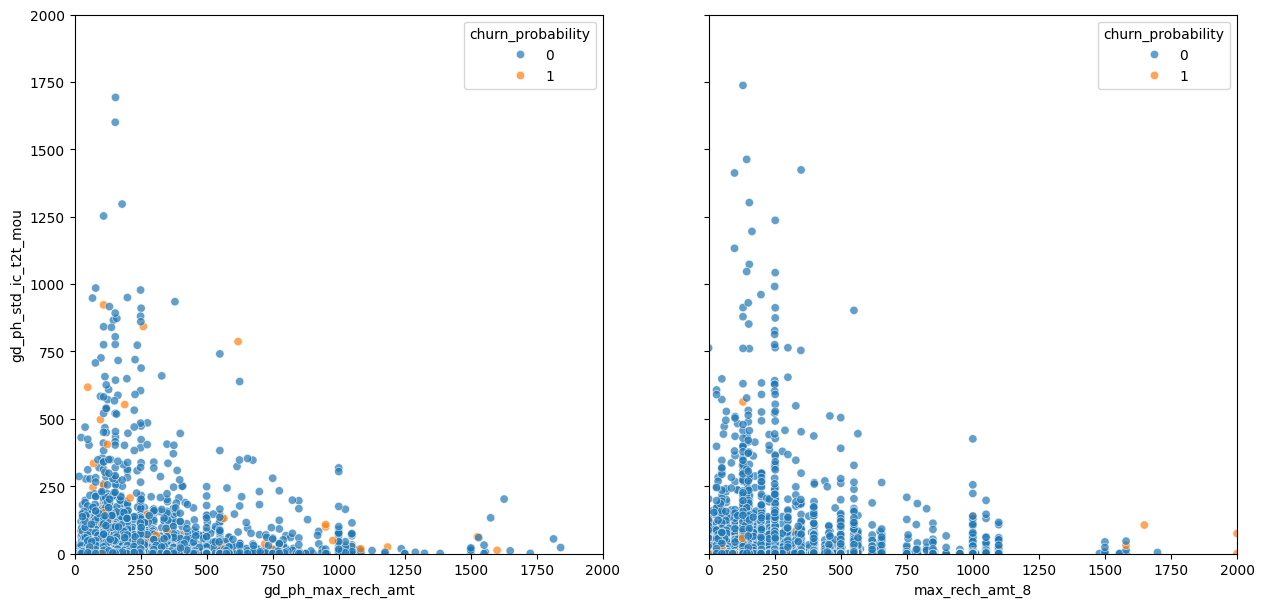

In [29]:
# Incoming from the same service provider vs the recharge amount

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(x='gd_ph_max_rech_amt', y='gd_ph_std_ic_t2t_mou', data=churn_data, ax=axes[0],
                hue='churn_probability', alpha=0.7)
sns.scatterplot(x='max_rech_amt_8', y='std_ic_t2t_mou_8', data=churn_data, ax=axes[1], hue='churn_probability', alpha=0.7)

# Limiting the graph to more general upper bound
axes[0].set_xlim(0,2000)
axes[1].set_xlim(0,2000)
plt.ylim(0,2000)

plt.show()

Observation
 - Users who have max recharge amount on the higher end and still have low incoming call mou during the good pahse, churned out more

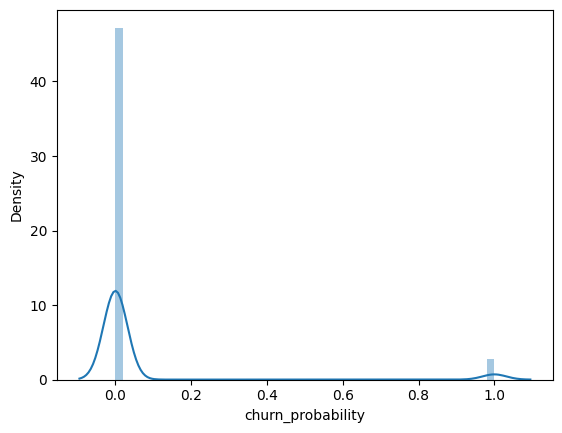

In [30]:
# Distribution of target variable

sns.distplot(churn_data['churn_probability'])
plt.show()

Observation
 - Though the varible is not skwed it is higly imbalanced, the number of non-churners in the dataset is around 94%

## Model Preparation 

In [31]:
y_train = churn_data['churn_probability']
X_train = churn_data.drop('churn_probability', axis=1)

In [32]:
# Standardisation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_filtered = scaler.fit_transform(X_train)
X_train_filtered

array([[-1.73701635, -0.81972326, -0.17010243, ...,  2.18006194,
        -0.42456204, -0.40531664],
       [-1.73647077, -0.36358116, -0.17010243, ..., -0.47088155,
        -0.42456204, -0.40531664],
       [-1.73607399, -0.09096843, -0.17010243, ..., -0.47088155,
        -0.42456204, -0.40531664],
       ...,
       [ 1.7342838 , -0.76570596,  6.62008103, ...,  1.56830575,
        -0.37979202, -0.40531664],
       [ 1.7343334 , -0.38121247, -0.17010243, ...,  0.75263083,
        -0.42456204, -0.40531664],
       [ 1.73448219, -0.73590809, -0.17010243, ..., -0.47088155,
         2.60558516,  1.15176505]])

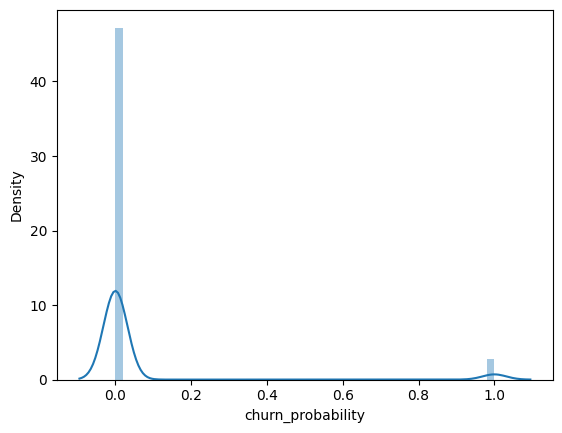

In [33]:
sns.distplot(y_train)
plt.show()

## Feature Selection

In [34]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(X_train_filtered, y_train)

RandomForestClassifier(n_jobs=-1)

In [35]:
feature_importances = pd.DataFrame({'col':X_train.columns, 'importance':rf.feature_importances_})
feature_importances.sort_values(by="importance", ascending=False)

col  importance
11            loc_ic_mou_8    0.079610
2            roam_ic_mou_8    0.046708
3            roam_og_mou_8    0.043449
1                   arpu_8    0.040575
5             loc_og_mou_8    0.036270
32        gd_ph_std_og_mou    0.032857
29         gd_ph_total_mou    0.029642
14            std_ic_mou_8    0.029251
36        gd_ph_loc_ic_mou    0.028554
26                     aon    0.028056
20      last_day_rch_amt_8    0.027920
35        gd_ph_loc_og_mou    0.027864
45    gd_ph_total_rech_num    0.027245
30              gd_ph_arpu    0.026692
27             total_mou_8    0.026367
0                       id    0.025706
19          max_rech_amt_8    0.024555
40        gd_ph_std_ic_mou    0.024168
51      gd_ph_max_rech_amt    0.024142
47       gd_ph_roam_og_mou    0.023115
7             std_og_mou_8    0.022458
41    gd_ph_std_ic_t2t_mou    0.020778
34       gd_ph_roam_ic_mou    0.019939
44  gd_ph_last_day_rch_amt    0.019597
33        gd_ph_spl_og_mou    0.019115
18        total_rech_num_8    0.018667
21             vol_2g_mb_8    0.016733
37         gd_ph_vol_2g_mb    0.016186
12        std_ic_t2t_mou_8    0.015041
31    gd_ph_loc_og_t2c_mou    0.013330
9             spl_og_mou_8    0.012740
52         gd_ph_ic_others    0.011305
50        gd_ph_isd_ic_mou    0.011098
39         gd_ph_og_others    0.010471
53         gd_ph_sachet_2g    0.010175
55                vbc_3g_8    0.009989
54            gd_ph_vbc_3g    0.009849
28        gd_ph_spl_ic_mou    0.009382
4         loc_og_t2c_mou_8    0.009285
42    gd_ph_std_ic_t2f_mou    0.009263
46        gd_ph_isd_og_mou    0.007449
17             ic_others_8    0.006404
38    gd_ph_std_og_t2f_mou    0.006018
16            isd_ic_mou_8    0.005834
48         gd_ph_sachet_3g    0.005549
23             sachet_2g_8    0.005408
13        std_ic_t2f_mou_8    0.004422
8             isd_og_mou_8    0.003901
49        gd_ph_monthly_3g    0.003785
43        gd_ph_monthly_2g    0.003289
25             sachet_3g_8    0.002334
6         std_og_t2f_mou_8    0.002093
15            spl_ic_mou_8    0.001914
24            monthly_3g_8    0.001800
22            monthly_2g_8    0.001277
10             og_others_8    0.000379

Observation - 

This shows that the important variables that are strong predictors of churn are - 
 - loc_ic_mou_8
 - roam_ic_mou_8
 - roam_og_mou_8
 - arpu_8	

<BarContainer object of 56 artists>

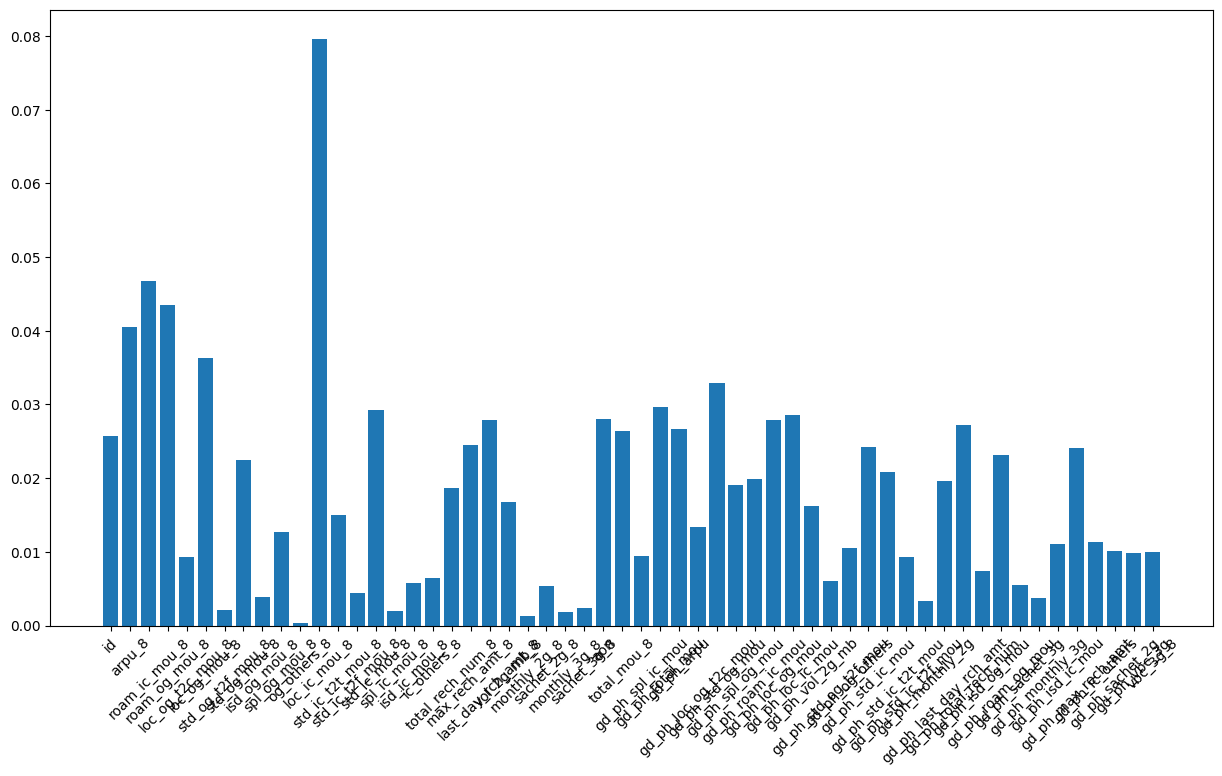

In [36]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
plt.bar(feature_importances['col'], feature_importances['importance'])

## PCA

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_train_pca = pca.fit_transform(X_train_filtered)

In [38]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train_filtered, y_train, train_size=0.7, test_size=0.3, random_state=25)

## Model Building

In [39]:
import statsmodels.api as sm
# Initial logistic regression model
logm1 = sm.GLM(y_train1,(sm.add_constant(X_train1)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                13804
Model:                            GLM   Df Residuals:                    13747
Model Family:                Binomial   Df Model:                           56
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 02 Jun 2024   Deviance:                       4261.4
Time:                        21:31:27   Pearson chi2:                 7.30e+05
No. Iterations:                    15   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5559      0.281    -16.206      0.000      -5.107      -4.005
x1             0.0114      0.042      0.274      0.784      -0.070       0.093
x2            -0.2083      0.153     -1.360      0.174      -0.508       0.092
x3            -0.0544      0.043     -1.270      0.204      -0.138       0.030
x4             1.1684      0.673      1.737      0.082      -0.150       2.487
x5             0.1331      0.066      2.027      0.043       0.004       0.262
x6             3.3020      2.290      1.442      0.149      -1.186       7.790
x7            -0.0106      0.097     -0.109      0.913      -0.200       0.179
x8             5.7106      3.825      1.493      0.135      -1.786      13.207
x9             0.3398      0.326      1.041      0.298      -0.300       0.980
x10           -0.0620      0.144     -0.431      0.667      -0.344       0.220
x11           -8.2532     14.022     -0.589      0.556     -35.736      19.230
x12           -1.7273      0.190     -9.086      0.000      -2.100      -1.355
x13           -0.1487      0.165     -0.904      0.366      -0.471       0.174
x14            0.0201      0.126      0.160      0.873      -0.226       0.267
x15           -0.4325      0.159     -2.728      0.006      -0.743      -0.122
x16           -0.8301      0.165     -5.026      0.000      -1.154      -0.506
x17           -0.0625      0.060     -1.042      0.297      -0.180       0.055
x18            0.0971      0.100      0.967      0.333      -0.100       0.294
x19           -0.4460      0.098     -4.551      0.000      -0.638      -0.254
x20            0.1250      0.064      1.952      0.051      -0.001       0.251
x21           -0.4934      0.083     -5.923      0.000      -0.657      -0.330
x22           -0.4028      0.140     -2.882      0.004      -0.677      -0.129
x23           -0.6323      0.129     -4.910      0.000      -0.885      -0.380
x24           -0.4645      0.110     -4.216      0.000      -0.680      -0.249
x25           -0.5558      0.132     -4.199      0.000      -0.815      -0.296
x26           -0.1899      0.105     -1.814      0.070      -0.395       0.015
x27           -0.2024      0.054     -3.765      0.000      -0.308      -0.097
x28           -6.9471      4.394     -1.581      0.114     -15.559       1.665
x29            0.0378      0.028      1.349      0.177      -0.017       0.093
x30            0.6896      4.518      0.153      0.879      -8.165       9.544
x31            0.0373      0.128      0.291      0.771      -0.214       0.289
x32           -0.1923      0.078     -2.469      0.014      -0.345      -0.040
x33           -0.2336      4.033     -0.058      0.954      -8.137       7.670
x34            0.1583      0.131      1.206      0.228      -0.099       0.416
x35            0.1216      0.047      2.563      0.010       0.029       0.215
x3

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Create LR object
logreg = LogisticRegression(solver='liblinear')

# Run RFE for 25 features
rfe = RFE(logreg, n_features_to_select=25)
rfe = rfe.fit(X_train1, y_train1)

In [41]:
# Build model with RFE selected features
rfe_col = X_train.columns[rfe.support_]
X_train_sm = sm.add_constant(X_train[rfe_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                19721
Model:                            GLM   Df Residuals:                    19695
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3090.2
Date:                Sun, 02 Jun 2024   Deviance:                       6180.4
Time:                        21:31:39   Pearson chi2:                 4.54e+05
No. Iterations:                    12   Pseudo R-squ. (CS):             0.1084
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3607      0.093    -14.666      0.000      -1.543      -1.179
arpu_8                  -0.0002      0.000     -1.854      0.064      -0.000    1.25e-05
roam_og_mou_8            0.0015      0.000      5.548      0.000       0.001       0.002
og_others_8             -0.6057      0.737     -0.822      0.411      -2.050       0.839
loc_ic_mou_8            -0.0063      0.000    -12.854      0.000      -0.007      -0.005
std_ic_mou_8            -0.0037      0.001     -4.558      0.000      -0.005      -0.002
spl_ic_mou_8            -6.9194      1.142     -6.058      0.000      -9.158      -4.681
total_rech_num_8        -0.0466      0.008     -5.651      0.000      -0.063      -0.030
max_rech_amt_8           0.0013      0.000      4.610      0.000       0.001       0.002
last_day_rch_amt_8      -0.0034      0.000     -7.558      0.000      -0.004      -0.003
vol_2g_mb_8             -0.0005      0.000     -1.919      0.055      -0.001    1.04e-05
monthly_2g_8            -1.5594      0.210     -7.409      0.000      -1.972      -1.147
sachet_2g_8             -0.1868      0.029     -6.453      0.000      -0.244      -0.130
monthly_3g_8            -0.8769      0.145     -6.051      0.000      -1.161      -0.593
sachet_3g_8             -0.1890      0.079     -2.389      0.017      -0.344      -0.034
aon                     -0.0002   4.63e-05     -4.728      0.000      -0.000      -0.000
total_mou_8             -0.0007      0.000     -6.561      0.000      -0.001      -0.001
gd_ph_std_og_mou         0.0007   6.87e-05      9.651      0.000       0.001       0.001
gd_ph_loc_ic_mou         0.0017      0.000      7.104      0.000       0.001       0.002
gd_ph_og_others         -0.0800      0.035     -2.277      0.023      -0.149      -0.011
gd_ph_std_ic_mou         0.0016      0.000      4.149      0.000       0.001       0.002
gd_ph_total_rech_num     0.0240      0.005      4.480      0.000       0.013       0.034
gd_ph_isd_og_mou         0.0020      0.001      2.463      0.014       0.000       0.004
gd_ph_roam_og_mou        0.0020      0.000      6.804      0.000       0.001       0.003
gd_ph_sachet_3g          0.1384      0.049      2.825      0.005       0.042       0.235
vbc_3g_8                -0.0003      0.000     -1.762      0.078      -0.001    3.51e-05
========================================================================================
"""

In [42]:
# Predict on train data
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0      0    0.048001          0
1      0    0.000664          0
2      0    0.116350          0
3      0    0.046288          0
4      0    0.008879          0

In [43]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[18533    96]
 [ 1003    89]]

Accuracy : 0.9442726028091881


In [44]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6       total_rech_num_8  8.02
20  gd_ph_total_rech_num  7.23
0                 arpu_8  6.62
17      gd_ph_loc_ic_mou  5.85
3           loc_ic_mou_8  5.76
15           total_mou_8  5.10
7         max_rech_amt_8  4.31
16      gd_ph_std_og_mou  2.87
8     last_day_rch_amt_8  2.70
19      gd_ph_std_ic_mou  2.59
4           std_ic_mou_8  2.56
14                   aon  2.28
13           sachet_3g_8  2.00
23       gd_ph_sachet_3g  1.97
22     gd_ph_roam_og_mou  1.65
12          monthly_3g_8  1.63
1          roam_og_mou_8  1.62
21      gd_ph_isd_og_mou  1.61
24              vbc_3g_8  1.60
11           sachet_2g_8  1.59
10          monthly_2g_8  1.44
9            vol_2g_mb_8  1.36
5           spl_ic_mou_8  1.08
18       gd_ph_og_others  1.06
2            og_others_8  1.03

In [46]:
# VIF of total_rech_num_8 is too high so lets delte it
rfe_col = rfe_col.drop('total_rech_num_8', 1)

X_train_sm = sm.add_constant(X_train[rfe_col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                19721
Model:                            GLM   Df Residuals:                    19696
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3107.7
Date:                Sun, 02 Jun 2024   Deviance:                       6215.4
Time:                        21:33:08   Pearson chi2:                 6.98e+05
No. Iterations:                    12   Pseudo R-squ. (CS):             0.1068
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.4071      0.092    -15.367      0.000      -1.587      -1.228
arpu_8                  -0.0004      0.000     -2.648      0.008      -0.001   -9.63e-05
roam_og_mou_8            0.0014      0.000      5.328      0.000       0.001       0.002
og_others_8             -0.6473      0.756     -0.856      0.392      -2.129       0.835
loc_ic_mou_8            -0.0065      0.000    -13.277      0.000      -0.007      -0.006
std_ic_mou_8            -0.0038      0.001     -4.725      0.000      -0.005      -0.002
spl_ic_mou_8            -7.1667      1.153     -6.213      0.000      -9.427      -4.906
max_rech_amt_8           0.0015      0.000      5.558      0.000       0.001       0.002
last_day_rch_amt_8      -0.0031      0.000     -7.053      0.000      -0.004      -0.002
vol_2g_mb_8             -0.0005      0.000     -1.988      0.047      -0.001   -7.15e-06
monthly_2g_8            -1.6026      0.211     -7.609      0.000      -2.015      -1.190
sachet_2g_8             -0.2205      0.028     -7.824      0.000      -0.276      -0.165
monthly_3g_8            -0.9200      0.146     -6.319      0.000      -1.205      -0.635
sachet_3g_8             -0.2326      0.078     -2.997      0.003      -0.385      -0.080
aon                     -0.0002   4.64e-05     -4.653      0.000      -0.000      -0.000
total_mou_8             -0.0010      0.000     -9.446      0.000      -0.001      -0.001
gd_ph_std_og_mou         0.0008   6.68e-05     11.611      0.000       0.001       0.001
gd_ph_loc_ic_mou         0.0019      0.000      7.904      0.000       0.001       0.002
gd_ph_og_others         -0.0681      0.034     -1.989      0.047      -0.135      -0.001
gd_ph_std_ic_mou         0.0017      0.000      4.338      0.000       0.001       0.002
gd_ph_total_rech_num     0.0043      0.004      1.028      0.304      -0.004       0.013
gd_ph_isd_og_mou         0.0028      0.001      4.778      0.000       0.002       0.004
gd_ph_roam_og_mou        0.0022      0.000      7.538      0.000       0.002       0.003
gd_ph_sachet_3g          0.1544      0.048      3.230      0.001       0.061       0.248
vbc_3g_8                -0.0003      0.000     -1.636      0.102      -0.001    5.71e-05
========================================================================================
"""

In [47]:
# Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0      0    0.043497          0
1      0    0.000610          0
2      0    0.104553          0
3      0    0.055116          0
4      0    0.006904          0

In [48]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[18543    86]
 [ 1005    87]]

Accuracy : 0.9446782617514324


In [49]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                 arpu_8  6.27
16      gd_ph_loc_ic_mou  5.73
3           loc_ic_mou_8  5.71
14           total_mou_8  4.66
6         max_rech_amt_8  4.26
19  gd_ph_total_rech_num  3.08
15      gd_ph_std_og_mou  2.73
7     last_day_rch_amt_8  2.69
18      gd_ph_std_ic_mou  2.58
4           std_ic_mou_8  2.55
13                   aon  2.28
22       gd_ph_sachet_3g  1.94
12           sachet_3g_8  1.93
21     gd_ph_roam_og_mou  1.64
11          monthly_3g_8  1.63
1          roam_og_mou_8  1.62
23              vbc_3g_8  1.60
20      gd_ph_isd_og_mou  1.58
10           sachet_2g_8  1.46
9           monthly_2g_8  1.43
8            vol_2g_mb_8  1.36
5           spl_ic_mou_8  1.08
17       gd_ph_og_others  1.06
2            og_others_8  1.03

In [50]:
# VIF of total_rech_num_8 is too high so lets delte it
rfe_col = rfe_col.drop('arpu_8', 1)

X_train_sm = sm.add_constant(X_train[rfe_col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                19721
Model:                            GLM   Df Residuals:                    19697
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3112.3
Date:                Sun, 02 Jun 2024   Deviance:                       6224.7
Time:                        21:33:54   Pearson chi2:                 7.16e+05
No. Iterations:                    12   Pseudo R-squ. (CS):             0.1064
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.4114      0.092    -15.373      0.000      -1.591      -1.231
roam_og_mou_8            0.0013      0.000      4.837      0.000       0.001       0.002
og_others_8             -0.6478      0.756     -0.857      0.392      -2.130       0.834
loc_ic_mou_8            -0.0066      0.000    -13.487      0.000      -0.008      -0.006
std_ic_mou_8            -0.0038      0.001     -4.732      0.000      -0.005      -0.002
spl_ic_mou_8            -7.1131      1.145     -6.212      0.000      -9.357      -4.869
max_rech_amt_8           0.0013      0.000      4.721      0.000       0.001       0.002
last_day_rch_amt_8      -0.0031      0.000     -6.706      0.000      -0.004      -0.002
vol_2g_mb_8             -0.0005      0.000     -2.028      0.043      -0.001   -1.76e-05
monthly_2g_8            -1.6252      0.210     -7.724      0.000      -2.038      -1.213
sachet_2g_8             -0.2215      0.028     -7.865      0.000      -0.277      -0.166
monthly_3g_8            -0.9528      0.144     -6.598      0.000      -1.236      -0.670
sachet_3g_8             -0.2471      0.077     -3.194      0.001      -0.399      -0.095
aon                     -0.0002   4.64e-05     -4.709      0.000      -0.000      -0.000
total_mou_8             -0.0012   9.27e-05    -12.577      0.000      -0.001      -0.001
gd_ph_std_og_mou         0.0008   6.64e-05     11.975      0.000       0.001       0.001
gd_ph_loc_ic_mou         0.0019      0.000      7.964      0.000       0.001       0.002
gd_ph_og_others         -0.0674      0.034     -1.971      0.049      -0.134      -0.000
gd_ph_std_ic_mou         0.0016      0.000      4.291      0.000       0.001       0.002
gd_ph_total_rech_num     0.0027      0.004      0.648      0.517      -0.005       0.011
gd_ph_isd_og_mou         0.0005      0.001      0.825      0.409      -0.001       0.002
gd_ph_roam_og_mou        0.0021      0.000      7.350      0.000       0.002       0.003
gd_ph_sachet_3g          0.1580      0.048      3.307      0.001       0.064       0.252
vbc_3g_8                -0.0003      0.000     -1.702      0.089      -0.001    4.52e-05
========================================================================================
"""

In [51]:
# Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0      0    0.043327          0
1      0    0.000565          0
2      0    0.107172          0
3      0    0.056027          0
4      0    0.006770          0

In [52]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[18541    88]
 [ 1006    86]]

Accuracy : 0.9445261396480908


In [53]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
15      gd_ph_loc_ic_mou  5.73
2           loc_ic_mou_8  5.69
5         max_rech_amt_8  3.89
13           total_mou_8  3.30
18  gd_ph_total_rech_num  2.93
14      gd_ph_std_og_mou  2.71
6     last_day_rch_amt_8  2.69
17      gd_ph_std_ic_mou  2.58
3           std_ic_mou_8  2.55
12                   aon  2.27
21       gd_ph_sachet_3g  1.93
11           sachet_3g_8  1.91
20     gd_ph_roam_og_mou  1.64
0          roam_og_mou_8  1.60
22              vbc_3g_8  1.59
10          monthly_3g_8  1.52
9            sachet_2g_8  1.46
8           monthly_2g_8  1.43
7            vol_2g_mb_8  1.36
4           spl_ic_mou_8  1.08
16       gd_ph_og_others  1.06
19      gd_ph_isd_og_mou  1.04
1            og_others_8  1.03

In [54]:
# VIF of total_rech_num_8 is too high so lets delte it
rfe_col = rfe_col.drop('gd_ph_loc_ic_mou', 1)
rfe_col = rfe_col.drop('loc_ic_mou_8', 1)

X_train_sm = sm.add_constant(X_train[rfe_col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                19721
Model:                            GLM   Df Residuals:                    19699
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3246.1
Date:                Sun, 02 Jun 2024   Deviance:                       6492.3
Time:                        21:35:46   Pearson chi2:                 9.18e+06
No. Iterations:                    12   Pseudo R-squ. (CS):            0.09414
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.5490      0.090    -17.189      0.000      -1.726      -1.372
roam_og_mou_8            0.0023      0.000      8.826      0.000       0.002       0.003
og_others_8             -0.7072      0.819     -0.863      0.388      -2.313       0.899
std_ic_mou_8            -0.0054      0.001     -6.190      0.000      -0.007      -0.004
spl_ic_mou_8            -7.2887      1.159     -6.287      0.000      -9.561      -5.016
max_rech_amt_8           0.0010      0.000      3.523      0.000       0.000       0.002
last_day_rch_amt_8      -0.0036      0.000     -7.494      0.000      -0.004      -0.003
vol_2g_mb_8             -0.0005      0.000     -1.780      0.075      -0.001     4.6e-05
monthly_2g_8            -1.7257      0.210     -8.208      0.000      -2.138      -1.314
sachet_2g_8             -0.2414      0.028     -8.559      0.000      -0.297      -0.186
monthly_3g_8            -0.9320      0.142     -6.561      0.000      -1.210      -0.654
sachet_3g_8             -0.2747      0.078     -3.534      0.000      -0.427      -0.122
aon                     -0.0003   4.52e-05     -7.251      0.000      -0.000      -0.000
total_mou_8             -0.0017   9.38e-05    -18.382      0.000      -0.002      -0.002
gd_ph_std_og_mou         0.0011   6.32e-05     18.180      0.000       0.001       0.001
gd_ph_og_others         -0.0713      0.034     -2.074      0.038      -0.139      -0.004
gd_ph_std_ic_mou         0.0020      0.000      5.450      0.000       0.001       0.003
gd_ph_total_rech_num    -0.0004      0.004     -0.095      0.924      -0.009       0.008
gd_ph_isd_og_mou         0.0013      0.001      2.276      0.023       0.000       0.003
gd_ph_roam_og_mou        0.0021      0.000      7.146      0.000       0.002       0.003
gd_ph_sachet_3g          0.1761      0.047      3.774      0.000       0.085       0.268
vbc_3g_8                -0.0004      0.000     -2.331      0.020      -0.001   -6.67e-05
========================================================================================
"""

In [55]:
# Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0      0    0.035255          0
1      0    0.006969          0
2      0    0.116761          0
3      0    0.081130          0
4      0    0.022310          0

In [56]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[18541    88]
 [ 1006    86]]

Accuracy : 0.9445261396480908


In [57]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4         max_rech_amt_8  3.84
12           total_mou_8  3.06
16  gd_ph_total_rech_num  2.74
5     last_day_rch_amt_8  2.69
15      gd_ph_std_ic_mou  2.56
2           std_ic_mou_8  2.55
13      gd_ph_std_og_mou  2.48
11                   aon  2.15
19       gd_ph_sachet_3g  1.93
10           sachet_3g_8  1.91
18     gd_ph_roam_og_mou  1.62
20              vbc_3g_8  1.59
0          roam_og_mou_8  1.58
9           monthly_3g_8  1.52
8            sachet_2g_8  1.45
7           monthly_2g_8  1.42
6            vol_2g_mb_8  1.36
3           spl_ic_mou_8  1.07
14       gd_ph_og_others  1.06
17      gd_ph_isd_og_mou  1.04
1            og_others_8  1.03

Now the VIF looks good

In [58]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [59]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.07875457875457875

In [60]:
# Let us calculate specificity
TN / float(TN+FP)

0.9952761822964196

In [61]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.0047238177035804395


In [62]:
# positive predictive value 
print (TP / float(TP+FP))

0.4942528735632184


In [63]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9485343019389164


In [64]:
## Ploting ROC

In [65]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

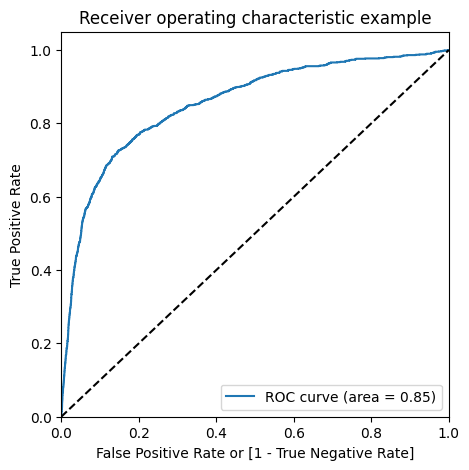

In [66]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [75]:
y_train_pred_final

Churn  Churn_Prob  predicted
0          0    0.035255          0
1          0    0.006969          0
2          0    0.116761          0
3          0    0.081130          0
4          0    0.022310          0
...      ...         ...        ...
19716      0    0.028414          0
19717      0    0.128452          0
19718      0    0.138585          0
19719      0    0.065508          0
19720      0    0.058067          0

[19721 rows x 3 columns]

In [80]:
X_test1 = X_test1[rfe_col]
X_test_sm = sm.add_constant(X_test1)

# Predict on test data

y_test_pred = res.predict(X_test_sm)
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices